## Student #1 ID: 207047150

## Student #2 ID: 206727638

# Exercise 1: Linear Regression

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Those tests will not be graded nor checked.
1. You are free to add code and markdown cells as you see fit.
1. Write your functions in this jupyter notebook only. Do not create external python modules and import from them.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only, unless otherwise mentioned.
1. Your code must run without errors. During the environment setup, you were given a specific version of Python of install (`Python >= 3.6, numpy >= 1.14`). 
1. Answers to qualitative questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. No not use ZIP or RAR. For example, your submission should look like this: `123456789.ipynb` if you worked by yourself or `123456789_987654321.ipynb` if you worked in pairs.

## In this exercise you will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
1. Pre-process the data for linear regression.
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
1. Perform multivariate linear regression.
1. Visualize your results using matplotlib.
1. Preform feature selection.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

# make matplotlib figures appear inline in the notebook
%matplotlib inline

In [119]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Part 1: Data Preprocessing (5 Points)

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 21,613 observations with 17 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [158]:
# Read comma separated data
df = pd.read_csv('kc_house_data.csv') # Relative paths are sometimes better than absolute paths.
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [159]:
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,2003,0,98038,47.3684,-122.031,2390,7570


In [122]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Since we are dealing with simple linear regression, we will extract the target values and the `sqft_living` variable from the dataset. Use pandas and select both columns as separate variables and transform them into a numpy array.**

In [160]:
sqft_living = df["sqft_living"].values
prices = df["price"].values


## Preprocessing

Before performing linear regression, we notice that some of the features are clearly irrelevant. Remove the features 
`id` and `date` from the dataframe and save the values of the relevant feature in a dedicated variable as a numpy array. Save the targets as a different variable, also as a numpy array.

We need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant. The features your should ignore are the `id` and `date`.

In [161]:
X = df.drop(['price', 'date', 'id'], axis=1).values
y = df['price'].values


As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes.

Implement the cost function `preprocess` and make sure you are using vectorized operations (5 points).

In [162]:
def preprocess(X, y):
    """
    Perform min-max scaling for both the data and the targets.
    Input:
    - X: Inputs (n features, m instances).
    - y: True labels (1 target, m instances).

    Output:
    - X: The scaled inputs.
    - y: The scaled labels.
    """
    ###########################################################################
    # TODO: Implement Min-Max Scaling.                                        #
    ###########################################################################
    X = (X - np.min(X, axis = 0))/(np.max(X, axis = 0) - np.min( X, axis = 0))
    y = (y-np.min(y, axis=0))/(np.max(y, axis = 0) - np.min(y, axis = 0))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return X, y


In [163]:
X, y = preprocess(X, y)

## Data Visualization

Many real-world datasets, such as the dataset we are dealing with, are highly dimensional and cannot be visualized naively. <br>
However, we can choose a feature and visualize the target price as a function of that feature. Pay close attention to the range of the axis, and include axis labels and a title for the figure. 

Text(0, 0.5, 'price')

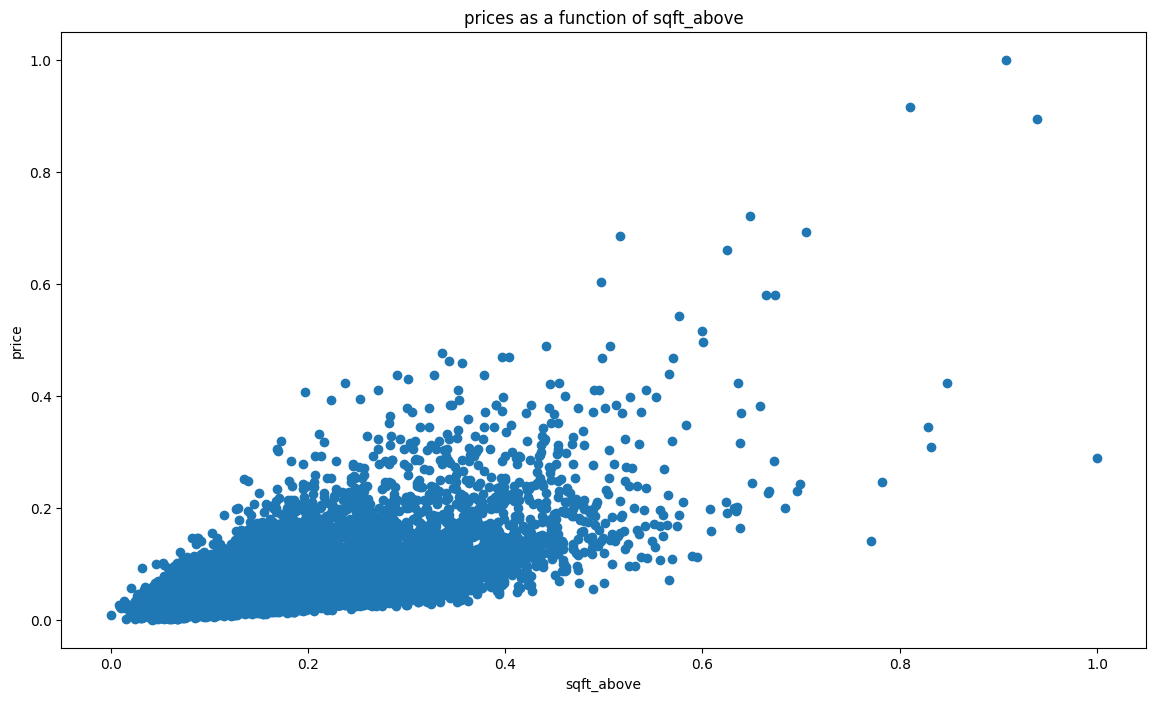

In [164]:
# Choose one fearture and plot the target price as a function of that feature
# Your code starts here
plt.scatter(X[:,9], y)
plt.title("prices as a function of sqft_above")
plt.xlabel("sqft_above")
plt.ylabel("price")
# Your code ends here

## Bias Trick

Make sure that the data variable `X` supports the bias term $\theta_0$. 

$$
\hat{y} = h_\theta(\vec{x}) = \vec{\theta^T} \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$

Add columns of ones as the zeroth column of `X`.

In [165]:
# Your code starts here
X[:,0] = np.ones(X.shape[0])
# Your code ends here

# Part 2: Multi Variable Linear Regression (65 Points)

In this part we will create a multivariate linear model and the logic needed to trained it using the given data.

Our task is to find a linear model that best explains our dataset. We start by guessing initial values for the linear regression parameters $\vec{\theta}$ and updating the values using gradient descent. The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

Implement the cost function `compute_cost`. (10 points)

In [166]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.

    Output:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    ###########################################################################
    # TODO: Implement the MSE cost function.                                  #
    ###########################################################################
    n = X.shape[0]
    J = np.sum((np.matmul(X,theta) - y)**2)/(2*n)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return J

In [167]:
np.random.seed(40) # seeding the random number generator allows us to obtain reproducible results
theta = np.array(np.random.random(size=X.shape[1]))
compute_cost(X, y, theta)

np.float64(5.1861313575358885)

Implement the function `gradient_descent`. (10 points)

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to learn the parameters of the model.
    
    Input:
    - X: Inputs (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of the model.
    - num_iters: The maximum number of iterations.
    
    Output:
    - theta: The learned parameters of the model.
    - J_history: A list of the cost function values at each iteration.
    """
    
    J_history = []  # Use a list to save cost in every iteration
    m = len(y)  # Number of training examples
    previous_cost = float('inf')  # Initialize to a large value for the first comparison
    thresh = 1e-8  # Convergence threshold
    T_history =[theta] # history of theta
    current_cost = compute_cost(X, y, theta)
    J_history.append(current_cost)

    for i in range(num_iters):
        y_predicted = np.matmul(X, theta)
        gradient = (1 / m) * np.matmul(X.T, (y_predicted - y))
        if np.any(np.isnan(gradient)) or np.any(np.isinf(gradient)):
            print("Warning: Gradient contains NaN or Inf values. Stopping.")
            break
        theta = theta - alpha * gradient
        T_history.append(theta)
        current_cost = compute_cost(X, y, theta)
        J_history.append(current_cost)
        if abs(previous_cost - current_cost) <= thresh:
            previous_cost = current_cost
            break
        
         

    return theta, J_history, np.array(T_history)

In [168]:
np.random.seed(42)
theta = np.random.random(size=X.shape[1])
iterations = 40000
alpha = 0.1
theta, J_history, T_history = gradient_descent(X ,y, theta, alpha, iterations)


You can evaluate the learning process by monitoring the loss as training progress. Visualize the loss as a function of the iterations using the `J_history` array. This might help you find problems with your code and might indicate that your model fails to converge. Your visualization should be clear and include a title, labels and a proper scale.

Text(0.5, 1.0, 'Cost Function History During Gradient Descent')

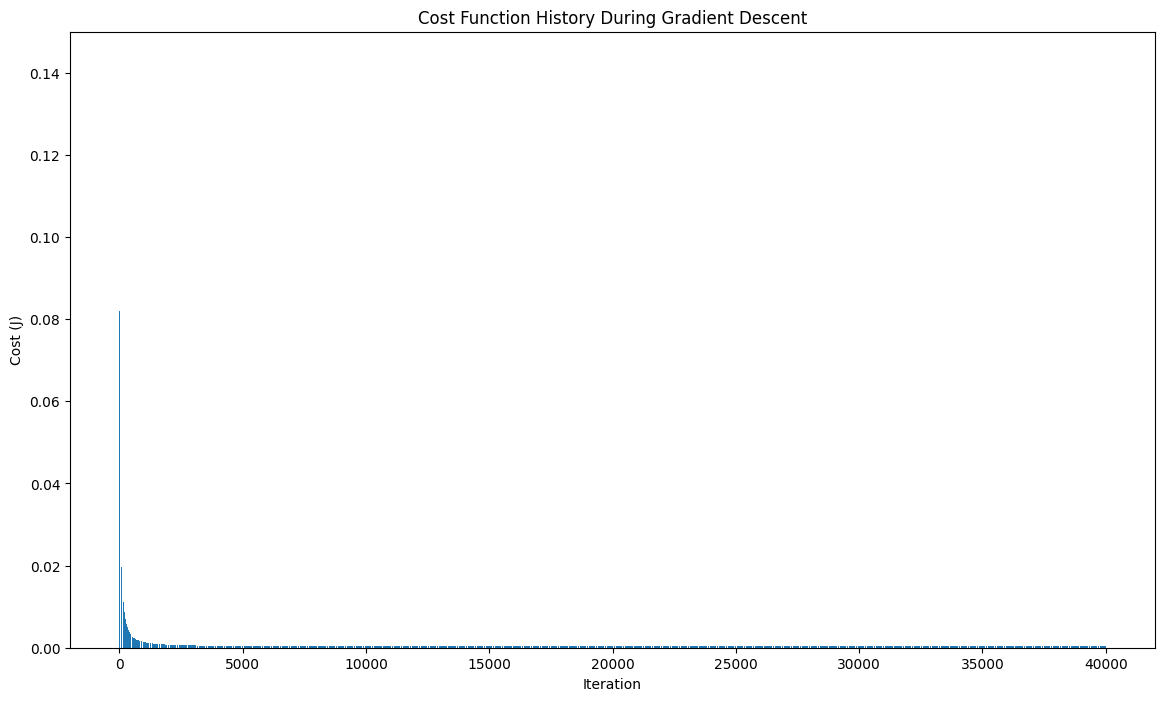

In [151]:
# Your code starts here
plt.bar(range(len(J_history)), J_history)
plt.ylim(0,0.15)
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title("Cost Function History During Gradient Descent")
# Your code ends here

Linear regression can also be solved by using the pseudo-inverse method. Implement the following function **without using `np.pinv`**. Instead, use direct matrix multiplication as you saw in class. (10 points)

In [152]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Outpu:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE numpy.pinv ##############
    """
    pinv_theta = [] # Use a python list to save cost in every iteration
    ###########################################################################
    # TODO: Implement the pseudoinverse algorithm.                            #
    ###########################################################################
    pinv_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pinv_theta

In [169]:
theta_pinv = pinv(X,y)
J_pinv = compute_cost(X, y, theta_pinv)


Use the results of the previous section to assess the convergence of the gradient descent process. Explain and use clear visualziations.

Your answer here:

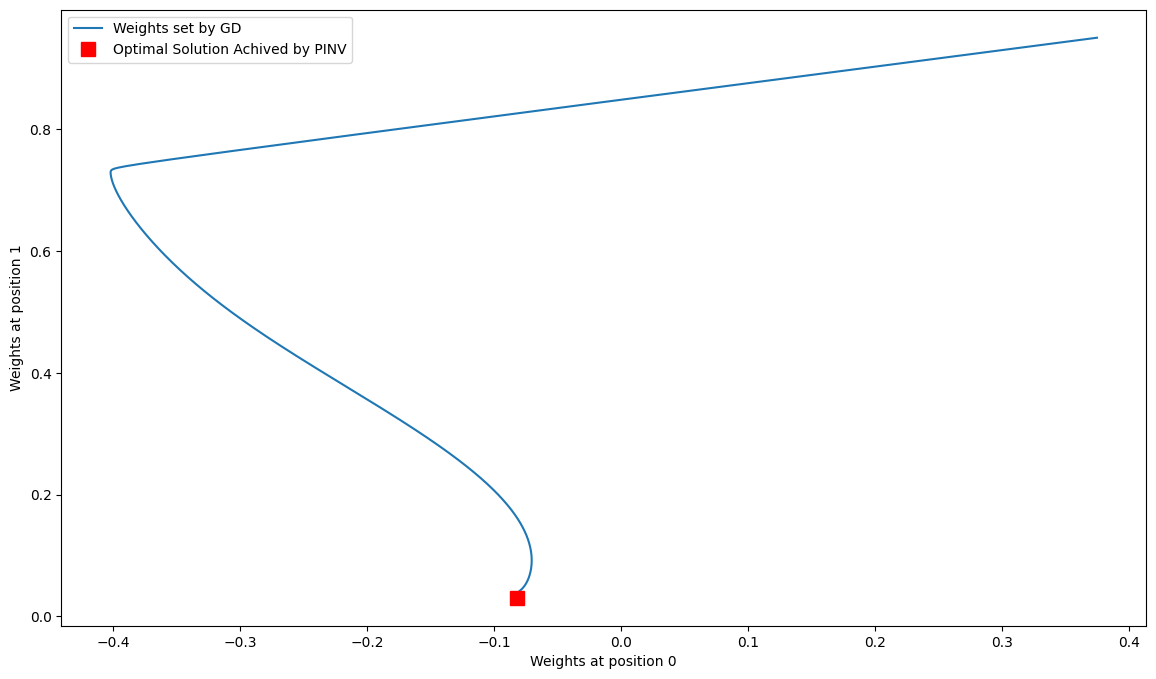

In [154]:
# Your code starts here
plt.plot(T_history[:,0],T_history[:,1],label = "Weights set by GD" )
plt.plot(theta_pinv[0], theta_pinv[1], 'rs', markersize = 10, label = "Optimal Solution Achived by PINV")
plt.xlabel('Weights at position 0')
plt.ylabel('Weights at position 1')
plt.legend()
# Your code ends here

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. 

In [170]:
def find_best_alpha(X, y, iterations):
    """
    Iterate over the provided values of alpha and maintain a python 
    dictionary with alpha as the key and the final loss as the value.
    For consistent results, use the same theta value for all runs.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels (1 value over m instances).
    - num_iters: The number of iterations performed.

    Output:
    - alpha_dict: A python dictionary containing alpha as the 
                  key and the final loss as the value
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for alpha in alphas:
        new_theta, _, _ = gradient_descent(X, y, theta, alpha, iterations)
        loss = compute_cost(X, y, new_theta)
        alpha_dict[alpha] = loss
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return alpha_dict

In [171]:
alpha_dict = find_best_alpha(X, y, 40000)
alpha_dict = {k: v for k, v in alpha_dict.items() if not np.isnan(v)}

/opt/anaconda3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/hm/x0ywtq191fg1bn25skwntmw80000gn/T/ipykernel_50312/1830758327.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(previous_cost - current_cost) <= thresh:
/var/folders/hm/x0ywtq191fg1bn25skwntmw80000gn/T/ipykernel_50312/822441489.py:20: RuntimeWarning: overflow encountered in square
  J = np.sum((np.matmul(X,theta) - y)**2)/(2*n)


Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions. 

**Explain the differences between the performance characteristics you observe.**

Your answer here:

In [173]:
best_alpha = min(alpha_dict, key=alpha_dict.get)
best_alpha

0.3

Pick the best three alpha values you just calculated and provide **one** graph with three lines indicating the loss as a function of iterations. Note you are required to provide general code for this purpose (no hard-coding). Make sure the visualization is clear and informative. (5 points)

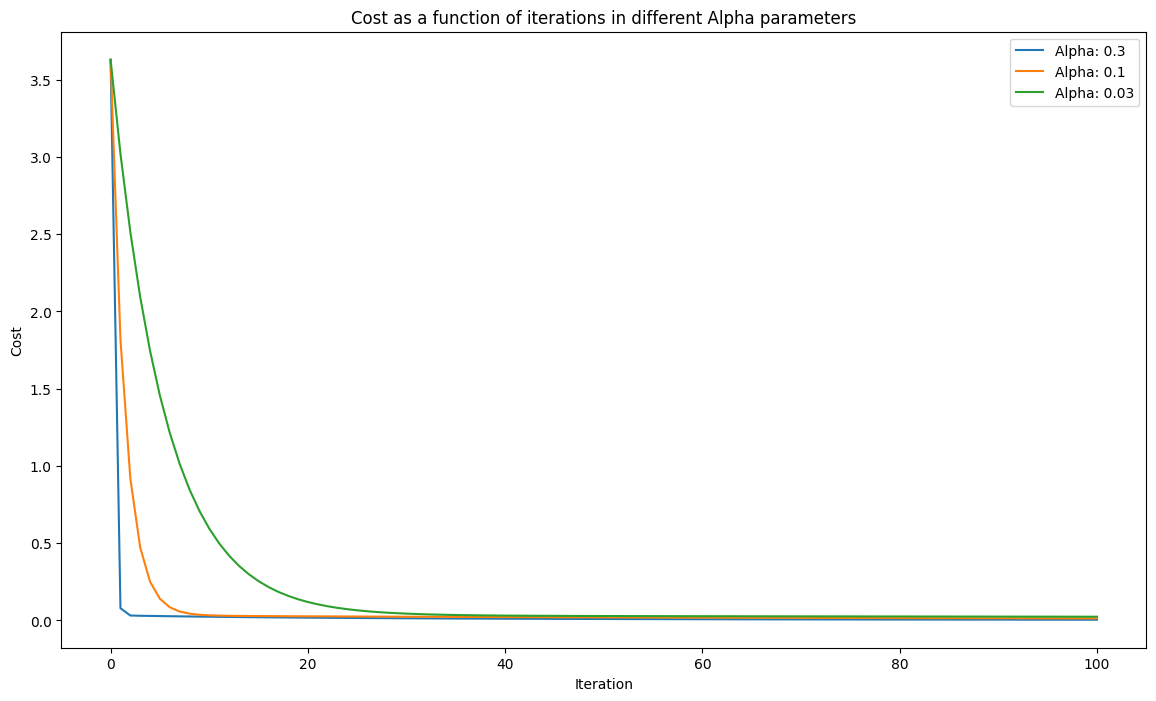

In [174]:
# Your code starts here

three_best_alphas = list(dict(sorted(alpha_dict.items(), key=lambda item: item[1])).keys())[:3]
for alpha in three_best_alphas:
    np.random.seed(10) # seeding the random number generator allows us to obtain reproducible results
    theta = np.array(np.random.random(size=X.shape[1]))
    _,j_history,_ = gradient_descent(X,y,theta, alpha, 100)
    plt.plot(range(len(j_history)), j_history, label = f"Alpha: {alpha}")
    plt.title("Cost as a function of iterations in different Alpha parameters")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    
# Your code ends here

Time for yet another visual sanity check. Create two scatter plots on the same figure: on one side, plot the predictions you obtained from a model trained using the alpha you previously found vs the predictions calculated using the optimal theta calculated using the pseudo-inverse. On the other size, create a scatter plot showing your model predictions vs the target values.

What do you expect to see? Explain the results.
 
Your answer here:

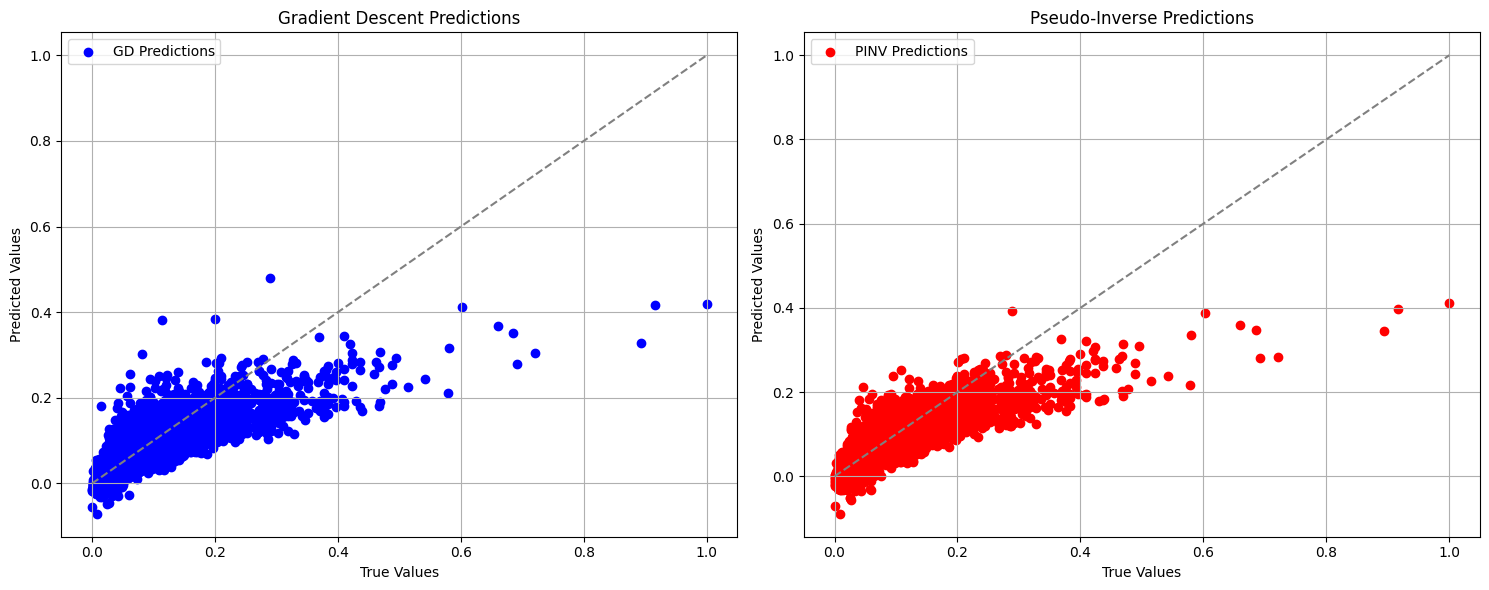

In [200]:
# Your code starts here
GD_theta,j_history,_ = gradient_descent(X,y,theta, best_alpha, 4000)
GD_predictions = np.matmul(X,GD_theta)
pinv_theta = pinv(X,y)
pinv_predictions = np.matmul(X,pinv_theta)

# Run Gradient Descent and Pseudo-Inverse Predictions
GD_theta, j_history, _ = gradient_descent(X, y, theta, best_alpha, 4000)
GD_predictions = np.matmul(X, GD_theta)
pinv_theta = pinv(X, y)
pinv_predictions = np.matmul(X, pinv_theta)

# Number of data points
iterations = len(y)

# Create side-by-side subplots
fig, plots = plt.subplots(1, 2, figsize=(15, 6))

# Plot diagonal dashed line for reference
plots[0].plot([0, 1], [0, 1], linestyle='--', color='gray')  # Adjusted to represent (0, 1)
plots[1].plot([0, 1], [0, 1], linestyle='--', color='gray')

# Scatter plot for Gradient Descent predictions
plots[0].scatter(y, GD_predictions, color='blue', label='GD Predictions')
plots[0].set_title('Gradient Descent Predictions')
plots[0].set_xlabel('True Values')
plots[0].set_ylabel('Predicted Values')
plots[0].legend()
plots[0].grid(True)

# Scatter plot for Pseudo-Inverse predictions
plots[1].scatter(y, pinv_predictions, color='red', label='PINV Predictions')
plots[1].set_title('Pseudo-Inverse Predictions')
plots[1].set_xlabel('True Values')
plots[1].set_ylabel('Predicted Values')
plots[1].legend()
plots[1].grid(True)
 
# Adjust layout
plt.tight_layout()
plt.show()


# Your code ends here

## Part 3: feature selection (30 points)

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance. Find the combination of three features that best minimizes the loss on the validation set. First, we will reload the dataset as a dataframe in order to access the feature names. Use the dataframe with the relevant features as the input to the `generate_triplets` and obtain a list of all possible feature triplets.

In [176]:
import itertools
def generate_triplets(X: pd.DataFrame):
    """
    generate all possible sets of three features out of all relevant features
    available from the given dataset X. Hint: check out the python package
    'itertools'.di

    Input:
    - X: Inputs (n features over m instances).

    Output:
    - A python list containing all feature triplets as integers.
    """
    
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    triplets = list(itertools.combinations(X.columns, 3))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return triplets


In [ ]:
X_for_now = df.drop(['price', 'date', 'id'], axis=1)
triplets = generate_triplets(X_for_now)



In order to choose the best triplet possible, we will train a model using the training dataset (70%) and evaluate its performance on the validation dataset (20%). It is crucial to randomly split the dataset to obtain significant results. We will use the remaining 10% for the testing dataset (final model evaluation).

In [ ]:
train_idx = np.random.choice(X_for_now.index, size=round(0.7*len(X)), replace=False)
X_minus_train = X_for_now.drop(train_idx, axis=0)
val_idx  = np.random.choice(X_minus_train.index, size=round(0.2*len(X)), replace=False)
X_minus_train_and_val = X_for_now.drop(val_idx, axis=0)
test_idx = X_minus_train_and_val.index.to_numpy()

# Your code starts here
# print(set(test_idx)&set(train_idx)&set(val_idx))
# print(train_idx)
# print("_"*100)
# print(val_idx)
# print("_"*100)
# print(test_idx)
# Your code ends here

In [ ]:
X_train = X[train_idx]
X_val  = X[val_idx]
X_test = X[test_idx]

y_train = y[train_idx]
y_val  = y[val_idx]
y_test = y[test_idx]

[[1.         0.375      0.18641509 ... 0.20847176 0.25830322 0.0143151 ]
 [1.         0.125      0.08603774 ... 0.26245847 0.26690759 0.0123715 ]
 [1.         0.28125    0.17886792 ... 0.34219269 0.38908966 0.02008388]
 ...
 [1.         0.21875    0.16075472 ... 0.60631229 0.1395629  0.00702775]
 [1.         0.21875    0.0709434  ... 0.35215947 0.16021339 0.00872897]
 [1.         0.3125     0.14339623 ... 0.55813953 0.30820857 0.00547356]]


Complete the function `find_best_triplet`. Note, this might take a while since there are hundreds of possible feature combinations. This is a good chance to check your gradient descent implementation and make sure it is efficient. 

In [198]:
def find_best_triplet(X_train, y_train, X_val, y_val, triplets, alpha, num_iter):
    """
    Iterate over all possible triplets and find the triplet that best 
    minimizes the cost function. You should first preprocess the data 
    and obtain a array containing the columns corresponding to the
    triplet. Don't forget the bias trick.

    Input:
    - X_train: training dataset.
    - y_train: training labels.
    - X_val: validation dataset.
    - y_val: validation labels.
    - triplets: a list of three features in X.
    - alpha: The value of the best alpha previously found.
    - num_iters: The number of updates performed.

    Output:
    - The best triplet.
    """
    best_triplet = None
    best_cost = float('inf')
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for triplet in triplets:
        feature_names = X_for_now.columns.tolist()
        feature_indices = [feature_names.index(feature) for feature in triplet]
        X_train_per_triplet = X_train[:, feature_indices]
        X_val_per_triplet = X_val[:, feature_indices]

        theta = np.array(np.random.random(size=X_train_per_triplet.shape[1]))
        theta,_ ,_= gradient_descent(X_train_per_triplet,y_train,theta, alpha, num_iter)
        
        curr_cost = compute_cost(X_val_per_triplet,y_val,theta)
        print(f'curr cost is {curr_cost}')
        if best_cost and curr_cost<best_cost:
            print("here "*10)
            best_cost = curr_cost
            best_triplet = triplet
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return best_triplet

In [199]:
find_best_triplet(X_train, y_train, X_val, y_val, triplets, alpha=best_alpha, num_iter=20000)

curr cost is 0.0005948557605332791
here here here here here here here here here here 
curr cost is 0.0008375574557299687
curr cost is 0.0008378407652992525
curr cost is 0.0007778387784414591
curr cost is 0.0007233190888149002
curr cost is 0.0008237607172912534
curr cost is 0.0006434763125275673
curr cost is 0.0007059514680845126
curr cost is 0.0007779249273713855
curr cost is 0.0008302157978651476
curr cost is 0.0008346359714411625
curr cost is 0.0007412365568853247
curr cost is 0.000827579666258861
curr cost is 0.0007201037368831083
curr cost is 0.0008365630301153009
curr cost is 0.0005933955422045965
here here here here here here here here here here 
curr cost is 0.0005946918550624053
curr cost is 0.0005509869530124623
here here here here here here here here here here 
curr cost is 0.0005422045584802083
here here here here here here here here here here 
curr cost is 0.0005868826029459862
curr cost is 0.0005522602582358608
curr cost is 0.0005956294794185673
curr cost is 0.000563529380

KeyboardInterrupt: 

### Forward Feature Selection

As you have seen in class, train the model using one feature at a time, and choose the best single feature (use the validation dataset and save the feature for which you obtain the best loss value). Next, check which feature performs best when added to the feature you previously chose. Repeat this process until you reach 3 features + bias.

In [ ]:
# Your code starts here

# Your code ends here

Use the testing dataset and report your findings. Explain the results.

In [ ]:
# Your code starts here

# Your code ends here